# Preparación y análisis de datos 

En primer lugar, antes de abordar los problemas de clasificación y regresión, buscamos hacernos una idea de cómo son los datos.

#### Carga de librerias

A lo largo del trabajo emplearemos la librería Pandas, para la manipulación de los datos. Además, para todo lo relacionado con los moelos de regresión y clasificación, usaremos la librería scikit-learn. Por último, para la visualización de datos, usaremos Matplotlib y Seaborn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

#### Carga de datos

Cargamos los datos usando dataframe de Pandas.

In [2]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')

### Primera visualización de los datos

Según el enunciado dado, nuestro conjunto de datos consta de 50.000 filas y numerosos atributos. Así, en función del perfil de los clientes, el banco puede decidir conceder o denegar un préstamo, reduciendo la probabilidad de un impago. También, podría estimar el riego de una operación de concesión de préstamos.

Hechemos un vistazo rápido a las primeras y últimas columnas para ver que tipos de atributos tenemos. 

In [3]:
df.head()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


In [4]:
df.tail()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
49995,49996,40,29951,600.0,Empleado/a por cuenta ajena,FP,18.0,5945,24,Divorciado/a,...,2495.916667,NaN,5,43626,0.145945,0.142934,286.261413,0.216859,1,38.4
49996,49997,31,31974,466.0,Empleado/a por cuenta ajena,Doctorado,NaN,13572,72,Casado/a,...,2664.500000,0.797176,6,10350,0.260572,0.245778,362.082922,0.318290,0,50.0
49997,49998,55,68679,611.0,Empleado/a por cuenta ajena,Bachillerato,31.0,16481,60,Casado/a,...,5723.250000,0.957306,7,31159,0.180981,0.182967,421.174132,0.186638,0,63.0
49998,49999,36,23501,599.0,Empleado/a por cuenta ajena,Bachillerato,11.0,29518,12,Casado/a,...,1250.000000,0.813055,2,61452,0.160018,0.148244,2661.800236,2.647840,0,61.0
49999,50000,24,31136,580.0,Empleado/a por cuenta ajena,FP,2.0,8380,36,NaN,...,2594.666667,NaN,7,11516,0.168380,0.167265,297.630591,0.477376,0,56.0


Observamos que tenemos:
- Variables binarias (HistoricoImagos, CreditoAprobado)
- Variables categóricas cualitativas (EstadoCivil, Experiencia)
- Variables categóricas discretas (Edad, DuracionCredito, CantidadPersonasDependientes, TasaUtilizacionTarjetaCredito, RatioTotalDeudaIngresos)
- Variables numéricas (IngresoBrutoAnual, BalanceCuentaCorriente, PatrimonioNeto)
- Valores nulos representados por un 'NaN'
- Variables objetivo: ScoreRiesgo (numérica), CreditoAprobado (categórica)
- Variable de identificación (Id)

Ahora veremos la forma de nuestro conjunto.

In [5]:
df.shape

(50000, 36)

Observamos que realmente tenemos 50.000 filas. Además, el número de variables será de 36.

Veamos si tenemos algún duplicado en nuestros datos.

In [6]:
df.drop_duplicates()
df.shape

(50000, 36)

Observamos que no tenemos duplicados.

Veamos ahora el tipo con el que se almacenan nuestros datos, así como el número de valores nulos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

Observamos que la mayoría de las variables se almacenan como numéricas. Las variables categóricas binarias ya están codificadas como enteros. De esta forma, solo va a ser necesario aplicar una codificación para aquellas variables categóricas como ObjetoCredito o EstadoCivil. Todas las variables categóricas que todavía no han sido codificadas son nominales. De esta forma, emplearemos One-Hot Encoding en lugar de Dummy Encoding cuando el modelo requiera una codificación de estas variables.

El motivo es que One-Hot Encoding crea una columna separada para cada categoría de las variables. Esto es preferible en nuestro caso, ya que tenemos 5 variables nominales, y con Dummy Encoding podríamos perder información valiosa al eliminar una categoría por cada variable. One-Hot Encoding, en cambio, preserva toda la información, lo que es crucial porque queremos que cada una de ellas sea representada de manera completa en el modelo.
 
Además, observamos que variables como EstadoCivil o Experiencia contienen muchos valores nulos.

### Valores nulos

Veamos más detalladamente que datos faltan.

In [10]:
null_columns = df.columns[df.isnull().any()]
print(df.isnull().sum()[null_columns])

ScoreCrediticio                2500
NivelEducativo                 5000
Experiencia                   13000
EstadoCivil                   11000
NumeroPersonasDependientes     6000
HistoricoPagosSuministros      8500
dtype: int64


Así, se nos presentan varias opciones para tratar con ellos. En primer lugar, podríamos intentar borrar las columnas o filas con valores nulos. Por otro lado, podríamos rellenar los valores nulos con una medida de tendencia central o mediante estimaciones.

Eliminar filas o columnas con valores nulos puede parecer una solución simple, pero conlleva serios problemas. Si eliminamos columnas como "Experiencia" o "ScoreCrediticio", estaríamos descartando información valiosa que podría ser crucial para el análisis. Además, eliminar filas con valores nulos implicaría perder una parte significativa del dataset (hasta un 26%), lo que reduciría la cantidad de datos disponibles para el análisis y los modelos predictivos, afectando su precisión.

En cambio, la imputación de valores nulos es una mejor opción porque nos permite conservar la mayoría de los datos. Al rellenar los valores vacíos con estimaciones basadas en tendencias, preservamos la integridad del dataset y evitamos la pérdida de información. Esto también ayuda a mantener la consistencia en los análisis y asegura que nuestros modelos sean más robustos y precisos, sin sacrificar una cantidad significativa de datos.

### <font color='red'>TODO</font> añadir diferentes tipos de imputers de skrlearn y ver cual vamos a usar

### Metadata

Antes de llevar a cabo el estudio descriptivo, es importante tener una idea de la información que nos interesa de nuestras variables. En este apartado, vamos a crear un DataFrame que incluya una descripción detallada de cada variable, como su tipo de dato, posibles valores y la cantidad de valores nulos. Este paso es clave para entender la estructura del dataset y nos ayudará a identificar qué variables requerirán mayor atención en el análisis descriptivo posterior, asegurando un estudio más completo y preciso.

De forma detallada, almacenaremos:
- rol: objetivo, id, predictora
- dtype: int, float, str
- keep: True o False
- nulos

In [11]:
data = []

for c in df.columns:
    
    # Rol
    if c == 'CreditoAprobado' or c == 'ScoreRiesgo':
        rol = 'objetivo'
    elif c == 'Id':
        rol = 'id'
    else:
        rol = 'predictora'
        
    # Dtype
    dtype = df[c].dtype
    
    # Keep
    keep = not c == 'Id'
    
    # Nulos
    nulos = df[c].isnull().sum()
    
    c_dict = {
        'varname': c,
        'rol': rol,
        'dtype': dtype,
        'keep': keep,
        'nulos': nulos
    }
    data.append(c_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'rol', 'dtype', 'keep', 'nulos'])
meta.set_index('varname', inplace=True)

In [12]:
meta

,rol,dtype,keep,nulos
varname,,,,
Id,id,int64,False,0
Edad,predictora,int64,True,0
IngresoBrutoAnual,predictora,int64,True,0
ScoreCrediticio,predictora,float64,True,2500
SituacionLaboral,predictora,object,True,0
NivelEducativo,predictora,object,True,5000
Experiencia,predictora,float64,True,13000
CuantiaCredito,predictora,int64,True,0
DuracionCredito,predictora,int64,True,0


### Análisis descriptivo

Podemos aplicar el análisis descriptivo en nuestro conjunto de datos. Sin embargo, no tiene mucho sentido calcular métricas como la media o la desviación estándar en variables categóricas y la variable id. Exploraremos visualmente las variables categóricas más adelante.

Gracias a nuestro metadata podemos seleccionar fácilmente las variables sobre las que queremos calcular las estadísticas descriptivas. Para dejar las cosas claras, haremos esto por tipo de datos.

#### Variables continuas

In [14]:
v = meta[(meta.dtype == 'float64') & (meta.keep) & (meta.rol == 'predictora')].index
df[v].describe()

,ScoreCrediticio,Experiencia,NumeroPersonasDependientes,TasaUtilizacionTarjetaCredito,RatioDeudaIngresos,IngresoBrutoMensual,HistoricoPagosSuministros,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
count,47500.000000,37000.000000,44000.000000,50000.000000,50000.000000,50000.000000,41500.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,570.975347,17.447459,1.539386,0.285653,0.285683,3009.648663,0.799806,0.194503,0.194582,519.574152,0.439196,50.742756
std,51.732132,11.280861,1.393505,0.159963,0.159389,2014.586218,0.120928,0.034073,0.039081,385.750819,0.311938,7.918796
min,358.000000,0.000000,0.000000,0.001204,0.000701,1250.000000,0.217950,0.088792,0.083259,44.093087,0.017110,26.400000
25%,539.000000,9.000000,0.000000,0.161648,0.161732,1596.958333,0.726844,0.170016,0.166589,280.615934,0.219170,44.800000
50%,578.000000,17.000000,1.000000,0.262764,0.264684,2435.416667,0.820477,0.191688,0.190946,414.927762,0.360822,52.000000
75%,609.000000,25.000000,3.000000,0.389237,0.388633,3720.750000,0.892515,0.216305,0.218748,626.940786,0.571029,56.000000
max,714.000000,62.000000,5.000000,0.946886,0.921339,25000.000000,0.999603,0.352866,0.378914,6343.673199,4.961286,81.000000


Existen grandes diferencias entre los rangos de las distintas variables. En algunos casos, estamos trabajando sobre lo que parecen ratios, como con TasaUtilizacionTarjetaCredito o RatioDeudaIngresos. En otros, los valores son de gran magnitud, como el ScoreCrediticio.

#### Variables ordinales

In [15]:
v = meta[(meta.dtype == 'int64') & (meta.keep) & (meta.rol == 'predictora')].index
df[v].describe()

,Edad,IngresoBrutoAnual,CuantiaCredito,DuracionCredito,PagoMensualDeuda,NumeroLineasCreditoAbiertas,NumeroSolicitudesCredito,HistoricoInsolvencia,HistoricoImpagos,HistoricoPagos,DuracionHistoricoCredito,BalanceCuentaAhorros,BalanceCuentaCorriente,TotalActivos,TotalPasivos,EstabilidadLaboral,PatrimonioNeto,CreditoAprobado
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.00000,5.000000e+04,50000.000000
mean,39.757580,36386.727360,15219.269420,53.716560,457.805840,3.009180,0.996600,0.05078,0.100660,24.013000,14.999280,4963.275200,1802.241480,9.943547e+04,3.647976e+04,4.99354,7.472013e+04,0.293240
std,11.606172,24526.447116,8102.208893,24.630848,245.646956,1.735833,1.004434,0.21955,0.300881,4.906595,8.364164,6519.685943,2320.408753,1.327941e+05,4.644231e+04,2.22108,1.295051e+05,0.455252
min,18.000000,15000.000000,1517.000000,12.000000,50.000000,0.000000,0.000000,0.00000,0.000000,7.000000,1.000000,65.000000,6.000000,2.272000e+03,2.560000e+02,0.00000,1.000000e+03,0.000000
25%,32.000000,19276.500000,9616.000000,36.000000,287.000000,2.000000,0.000000,0.00000,0.000000,21.000000,8.000000,1517.000000,559.000000,3.086250e+04,1.126000e+04,3.00000,8.580000e+03,0.000000
50%,40.000000,29379.000000,13427.000000,48.000000,402.000000,3.000000,1.000000,0.00000,0.000000,24.000000,15.000000,3003.000000,1096.000000,5.995250e+04,2.204050e+04,5.00000,3.280800e+04,0.000000
75%,48.000000,44947.750000,18805.250000,60.000000,566.000000,4.000000,2.000000,0.00000,0.000000,27.000000,22.000000,5939.000000,2144.000000,1.186862e+05,4.352900e+04,6.00000,9.012050e+04,1.000000
max,80.000000,300000.000000,116887.000000,120.000000,3332.000000,15.000000,7.000000,1.00000,1.000000,45.000000,29.000000,180190.000000,79957.000000,6.550918e+06,1.354161e+06,16.00000,6.526980e+06,1.000000


#### Variables dependientes

In [17]:
v = meta[(meta.rol == 'objetivo')].index
df[v].describe()

,CreditoAprobado,ScoreRiesgo
count,50000.000000,50000.000000
mean,0.293240,50.742756
std,0.455252,7.918796
min,0.000000,26.400000
25%,0.000000,44.800000
50%,0.000000,52.000000
75%,1.000000,56.000000
max,1.000000,81.000000


## Preprocesado de datos

Ánalisis de datos y preprocesamiento

#### EDA

In [2]:

df.head()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

Podemos observar que existen variables tanto numéricas como categóricas. Además, hay algunas variables como EstadoCivil o Experiencia que contienen muchos valores nulos. 

Eliminaremos la primera columna relativa al id. Además, para el problema de regresión eliminaremos también la penúltima columna relativa al creditoaprobado, que es una variable que también se buscará predecir con otro modelo de clasificación.

In [4]:
df = df.drop(['Id'], axis=1)
df = df.drop(['CreditoAprobado'], axis=1)
df.head()

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,0.0,...,45082,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,50.0
1,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,3.0,...,62161,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,54.0
2,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,NaN,...,19911,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,42.4
3,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,1.0,...,42385,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,45.6
4,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,1.0,...,7201,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,61.0


Vemos como se distribuye la variable objetivo

count    50000.000000
mean        50.742756
std          7.918796
min         26.400000
25%         44.800000
50%         52.000000
75%         56.000000
max         81.000000
Name: ScoreRiesgo, dtype: float64


<Figure size 900x800 with 0 Axes>

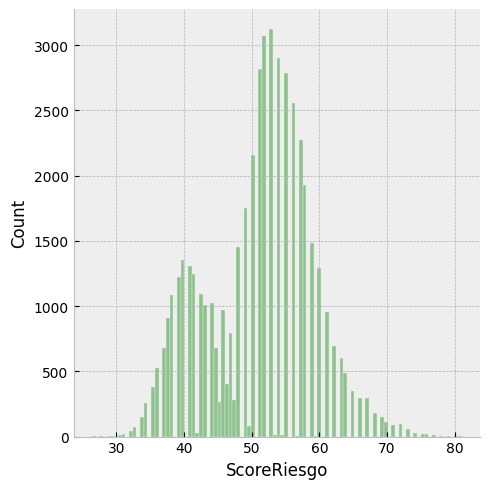

In [5]:
print(df['ScoreRiesgo'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['ScoreRiesgo'], kind='hist', color='g', bins=100, alpha=0.4);

Ahora estudiaremos la distribución de todas las variables. Primero veamos que tipos de variables tenemos.

In [6]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,44,22119,613.0,20.0,16154,60,0.0,488,0.390112,2,...,45082,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,50.0
1,26,28874,582.0,0.0,11800,24,3.0,718,0.388221,1,...,62161,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,54.0
2,38,84154,507.0,17.0,9257,36,NaN,170,0.358136,2,...,19911,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,42.4
3,51,29464,504.0,25.0,5495,36,1.0,402,0.282602,5,...,42385,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,45.6
4,39,20646,542.0,16.0,14824,60,1.0,242,0.156740,6,...,7201,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,61.0


array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'IngresoBrutoAnual'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'CuantiaCredito'}>],
       [<Axes: title={'center': 'DuracionCredito'}>,
        <Axes: title={'center': 'NumeroPersonasDependientes'}>,
        <Axes: title={'center': 'PagoMensualDeuda'}>,
        <Axes: title={'center': 'TasaUtilizacionTarjetaCredito'}>,
        <Axes: title={'center': 'NumeroLineasCreditoAbiertas'}>],
       [<Axes: title={'center': 'NumeroSolicitudesCredito'}>,
        <Axes: title={'center': 'RatioDeudaIngresos'}>,
        <Axes: title={'center': 'HistoricoInsolvencia'}>,
        <Axes: title={'center': 'HistoricoImpagos'}>,
        <Axes: title={'center': 'HistoricoPagos'}>],
       [<Axes: title={'center': 'DuracionHistoricoCredito'}>,
        <Axes: title={'center': 'BalanceCuentaAhorros'}>,
        <Axes: title={'center': 'BalanceC

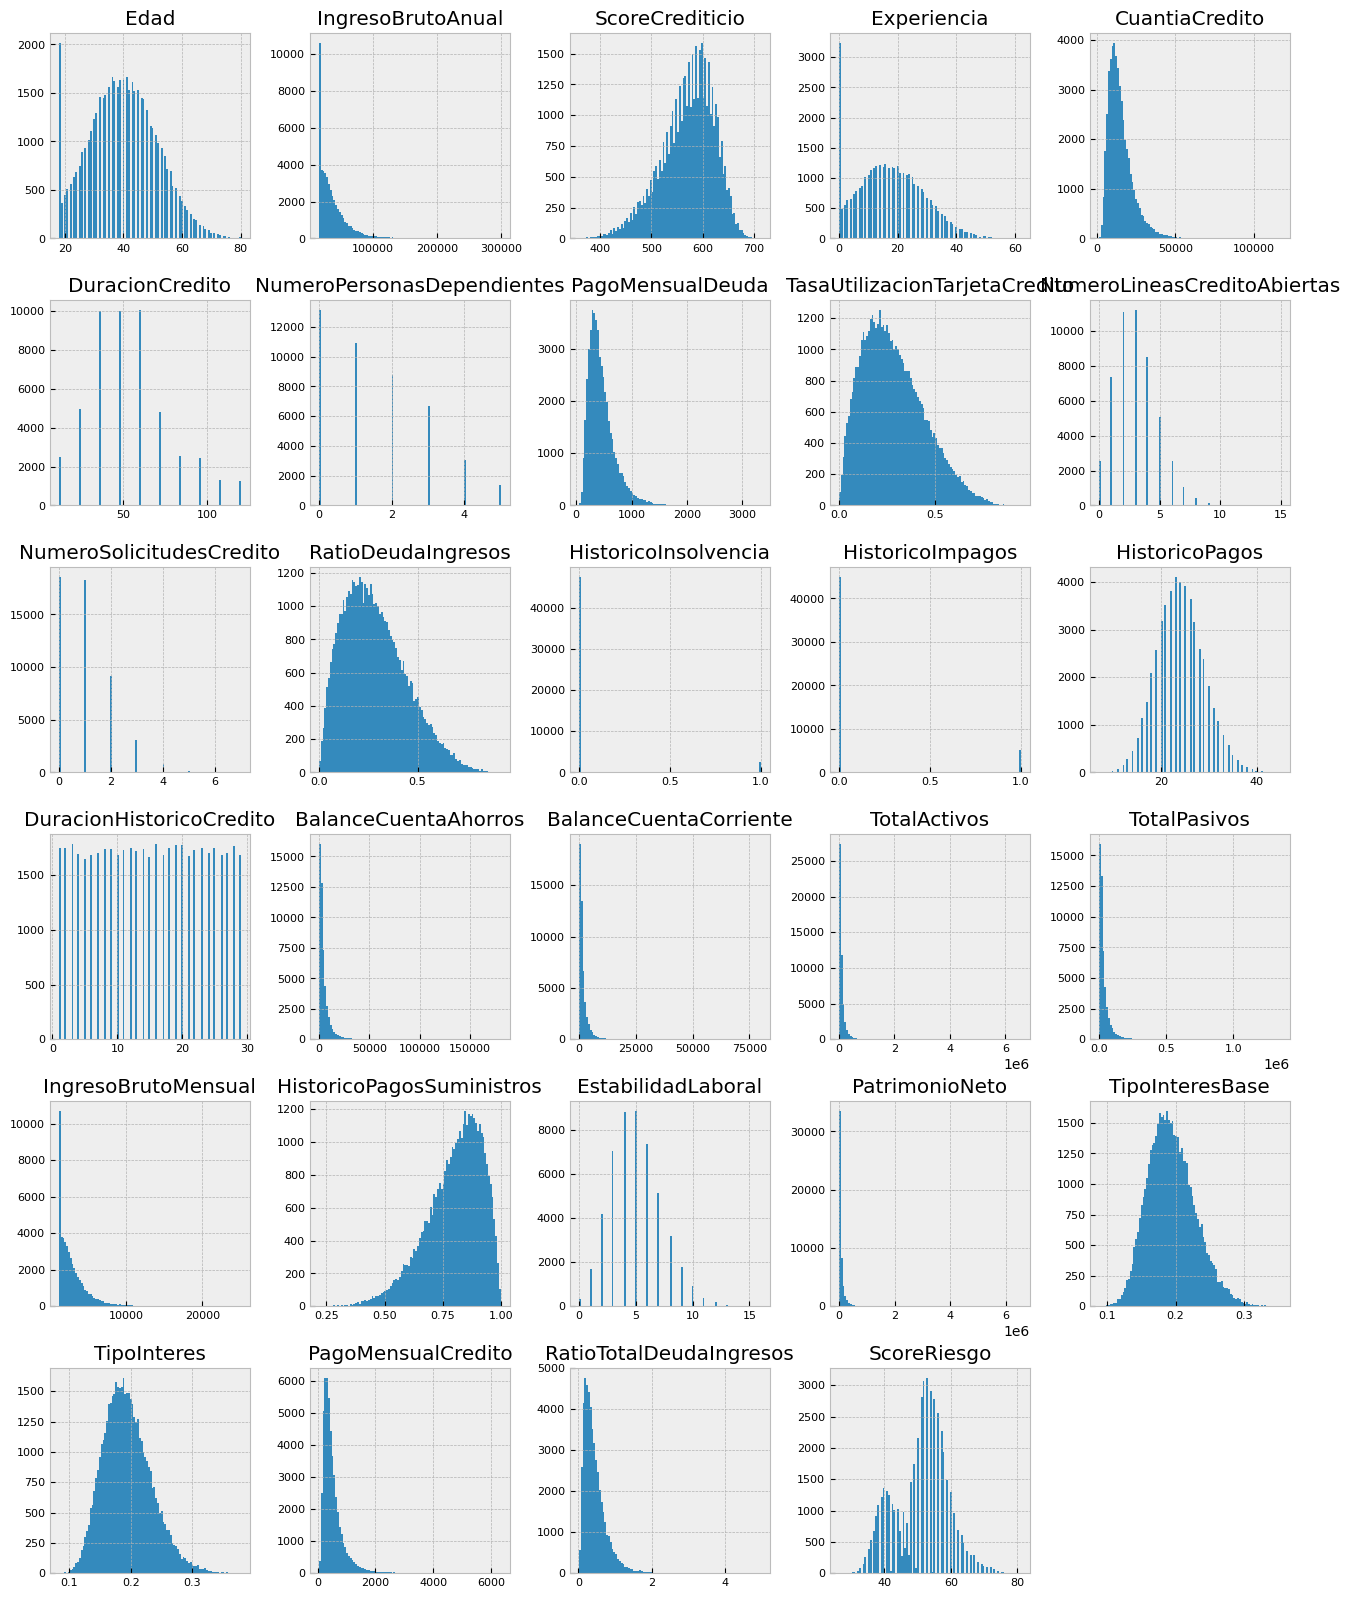

In [9]:
df_num.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

Ahora buscaremos aquellas variables que están fuertemente relacionadas con la variable dependiente.

Hay 0 variables altamente correlacionadas con ScoreRiesgo


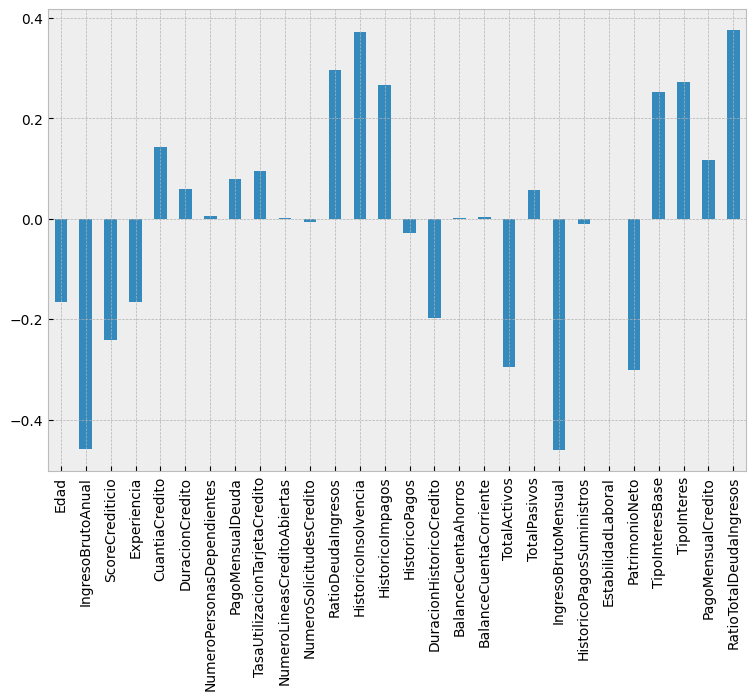

In [23]:
df_num_corr = df_num.corr()['ScoreRiesgo'][:-1]
df_num_corr.plot(kind='bar', figsize=(9, 6))
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Hay {} variables altamente correlacionadas con ScoreRiesgo".format(len(golden_features_list), golden_features_list))

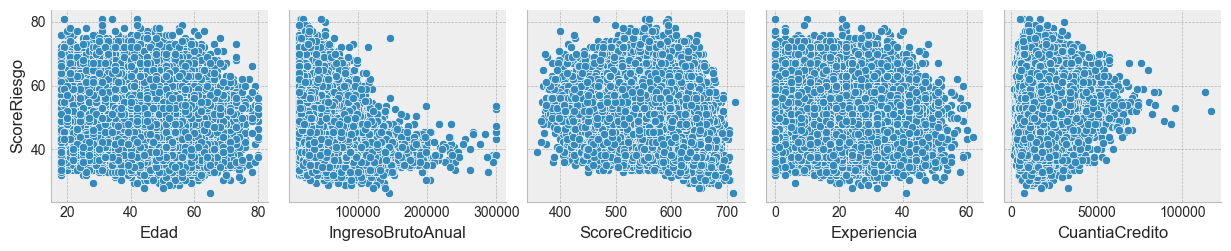

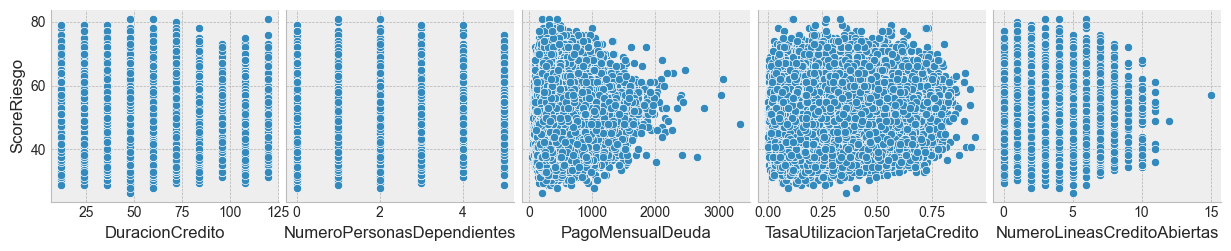

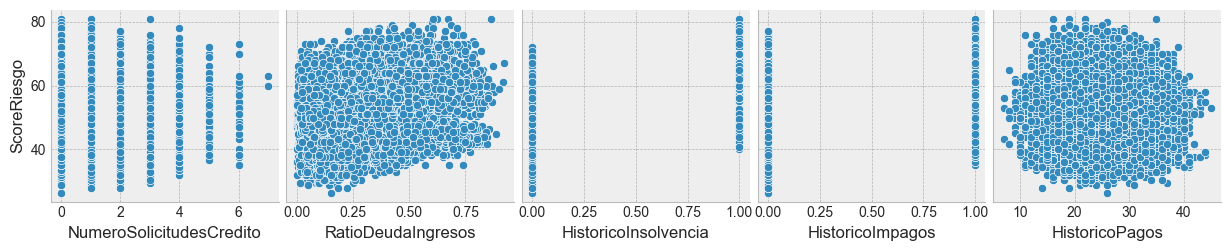

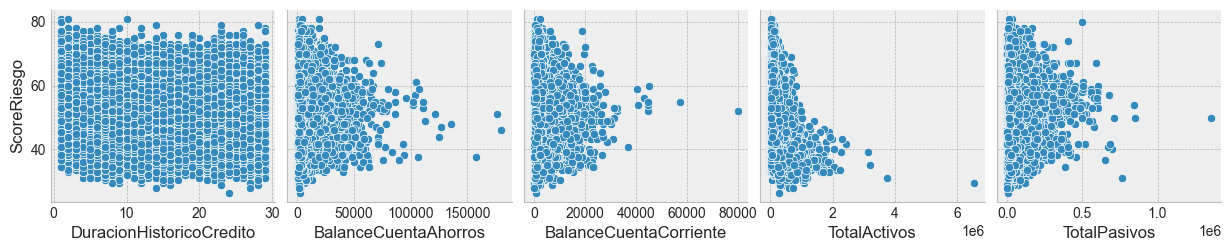

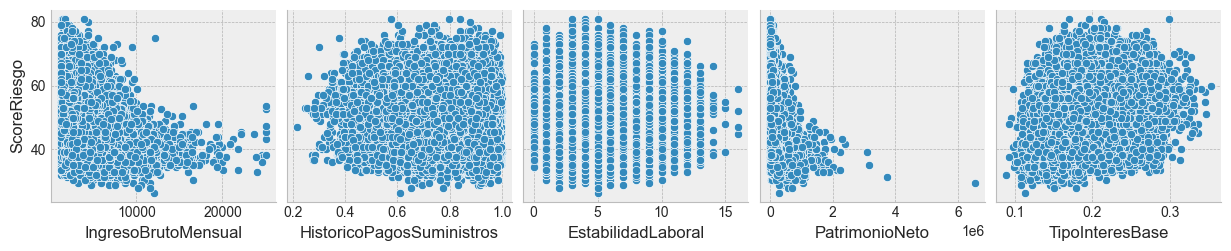

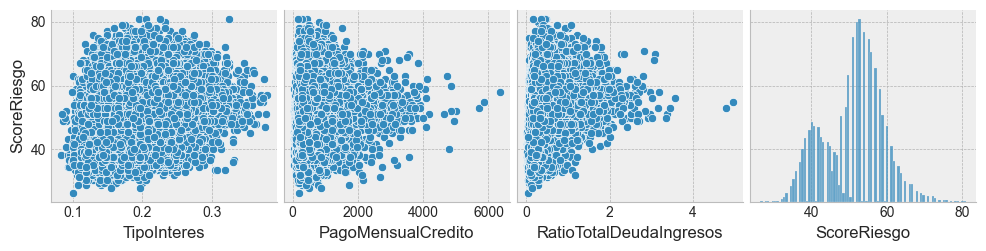

In [19]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, x_vars=df_num.columns[i:i+5], y_vars=['ScoreRiesgo'])

Librerías a utilizar para realizar el EDA.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

%matplotlib inline
sns.set_theme(color_codes=True)

Leemos el archivo del csv.

In [25]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')
df.head(5)

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


In [26]:
df.tail(5) #Imprime las ultimas 5 filas

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
49995,49996,40,29951,600.0,Empleado/a por cuenta ajena,FP,18.0,5945,24,Divorciado/a,...,2495.916667,NaN,5,43626,0.145945,0.142934,286.261413,0.216859,1,38.4
49996,49997,31,31974,466.0,Empleado/a por cuenta ajena,Doctorado,NaN,13572,72,Casado/a,...,2664.500000,0.797176,6,10350,0.260572,0.245778,362.082922,0.318290,0,50.0
49997,49998,55,68679,611.0,Empleado/a por cuenta ajena,Bachillerato,31.0,16481,60,Casado/a,...,5723.250000,0.957306,7,31159,0.180981,0.182967,421.174132,0.186638,0,63.0
49998,49999,36,23501,599.0,Empleado/a por cuenta ajena,Bachillerato,11.0,29518,12,Casado/a,...,1250.000000,0.813055,2,61452,0.160018,0.148244,2661.800236,2.647840,0,61.0
49999,50000,24,31136,580.0,Empleado/a por cuenta ajena,FP,2.0,8380,36,NaN,...,2594.666667,NaN,7,11516,0.168380,0.167265,297.630591,0.477376,0,56.0


Ahora comprobaremos el tipo de datos que tiene cada una de las columnas.

In [27]:
df.dtypes

Id                                 int64
Edad                               int64
IngresoBrutoAnual                  int64
ScoreCrediticio                  float64
SituacionLaboral                  object
NivelEducativo                    object
Experiencia                      float64
CuantiaCredito                     int64
DuracionCredito                    int64
EstadoCivil                       object
NumeroPersonasDependientes       float64
EstadoVivienda                    object
PagoMensualDeuda                   int64
TasaUtilizacionTarjetaCredito    float64
NumeroLineasCreditoAbiertas        int64
NumeroSolicitudesCredito           int64
RatioDeudaIngresos               float64
HistoricoInsolvencia               int64
ObjetoCredito                     object
HistoricoImpagos                   int64
HistoricoPagos                     int64
DuracionHistoricoCredito           int64
BalanceCuentaAhorros               int64
BalanceCuentaCorriente             int64
TotalActivos    

Eliminamos las columnas irrelevantes. En este caso son la de Id y la de CreditoAprobado.

In [28]:
df = df.drop(['Id', 'CreditoAprobado'], axis = 1)
df.head(5)

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,0.0,...,45082,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,50.0
1,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,3.0,...,62161,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,54.0
2,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,NaN,...,19911,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,42.4
3,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,1.0,...,42385,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,45.6
4,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,1.0,...,7201,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,61.0


Eliminamos duplicados. En este caso no tenemos ninguno.

In [29]:
df.shape

(50000, 34)

In [30]:
duplicated_rows_df = df[df.duplicated()]
print("Número de filas duplicadas: ", duplicated_rows_df.shape)

Número de filas duplicadas:  (0, 34)


El siguiente paso sería eliminar o rellenar los valores nulos. Vemos que hay columnas con numerosos valores nulos. Resaltan Experiencia y EstadoCivil, seguramente porque sean datos de carácter personal a los que el banco no tenga acceso tan fácil.

In [31]:
null_columns = df.columns[df.isnull().any()]
print(df.isnull().sum()[null_columns])

ScoreCrediticio                2500
NivelEducativo                 5000
Experiencia                   13000
EstadoCivil                   11000
NumeroPersonasDependientes     6000
HistoricoPagosSuministros      8500
dtype: int64


En nuestro caso, rellenaremos los datos con algún imputer de skrlearn. Se indicará más adelante al construir los pipes.

Observando las distribuciones, vemos que muchas columnas como 'IngresoBrutoAnual' o 'BalanceCuentaCorriente' presentan outliers. Se estandarizarán todas las variables numéricas usando RobustScaler, que usa la mediana y el intercuartil para dar mejores resultados con la presencia de outliers, pues evita que estos afecten a la estandarización al no usar la media y la varianza.

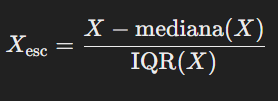

In [39]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_scaled.head()


,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,0.2500,-0.282807,0.500000,0.1875,0.296760,0.5,-0.333333,0.308244,0.559552,-0.5,...,0.714044,-0.278825,-0.296597,-1.000000,-0.054182,-0.259985,-0.370375,-0.034777,0.348150,-0.178571
1,-0.8750,-0.019672,0.057143,-1.0625,-0.177055,-1.0,0.666667,1.132616,0.551242,-1.0,...,1.243314,-0.013773,NaN,0.333333,1.009376,-0.667293,-0.348227,0.491071,0.513563,0.178571
2,-0.1250,2.133710,-1.014286,0.0000,-0.453791,-0.5,NaN,-0.831541,0.419054,-0.5,...,-0.065992,2.155304,0.370596,-0.333333,0.103752,0.303926,0.502864,-0.181188,-0.813854,-0.857143
3,0.6875,0.003311,-1.057143,0.5000,-0.863183,-0.5,0.000000,0.000000,0.087167,1.0,...,0.630466,0.009378,-0.140400,0.000000,-0.378720,0.255059,0.129152,-0.610300,-0.324532,-0.571429
4,-0.0625,-0.340186,-0.514286,-0.0625,0.152025,0.5,0.000000,-0.573477,-0.465854,1.5,...,-0.459869,-0.336623,-0.642524,-0.666667,-0.279579,0.478200,0.422351,-0.032926,0.040850,0.803571


array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'IngresoBrutoAnual'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'CuantiaCredito'}>],
       [<Axes: title={'center': 'DuracionCredito'}>,
        <Axes: title={'center': 'NumeroPersonasDependientes'}>,
        <Axes: title={'center': 'PagoMensualDeuda'}>,
        <Axes: title={'center': 'TasaUtilizacionTarjetaCredito'}>,
        <Axes: title={'center': 'NumeroLineasCreditoAbiertas'}>],
       [<Axes: title={'center': 'NumeroSolicitudesCredito'}>,
        <Axes: title={'center': 'RatioDeudaIngresos'}>,
        <Axes: title={'center': 'HistoricoInsolvencia'}>,
        <Axes: title={'center': 'HistoricoImpagos'}>,
        <Axes: title={'center': 'HistoricoPagos'}>],
       [<Axes: title={'center': 'DuracionHistoricoCredito'}>,
        <Axes: title={'center': 'BalanceCuentaAhorros'}>,
        <Axes: title={'center': 'BalanceC

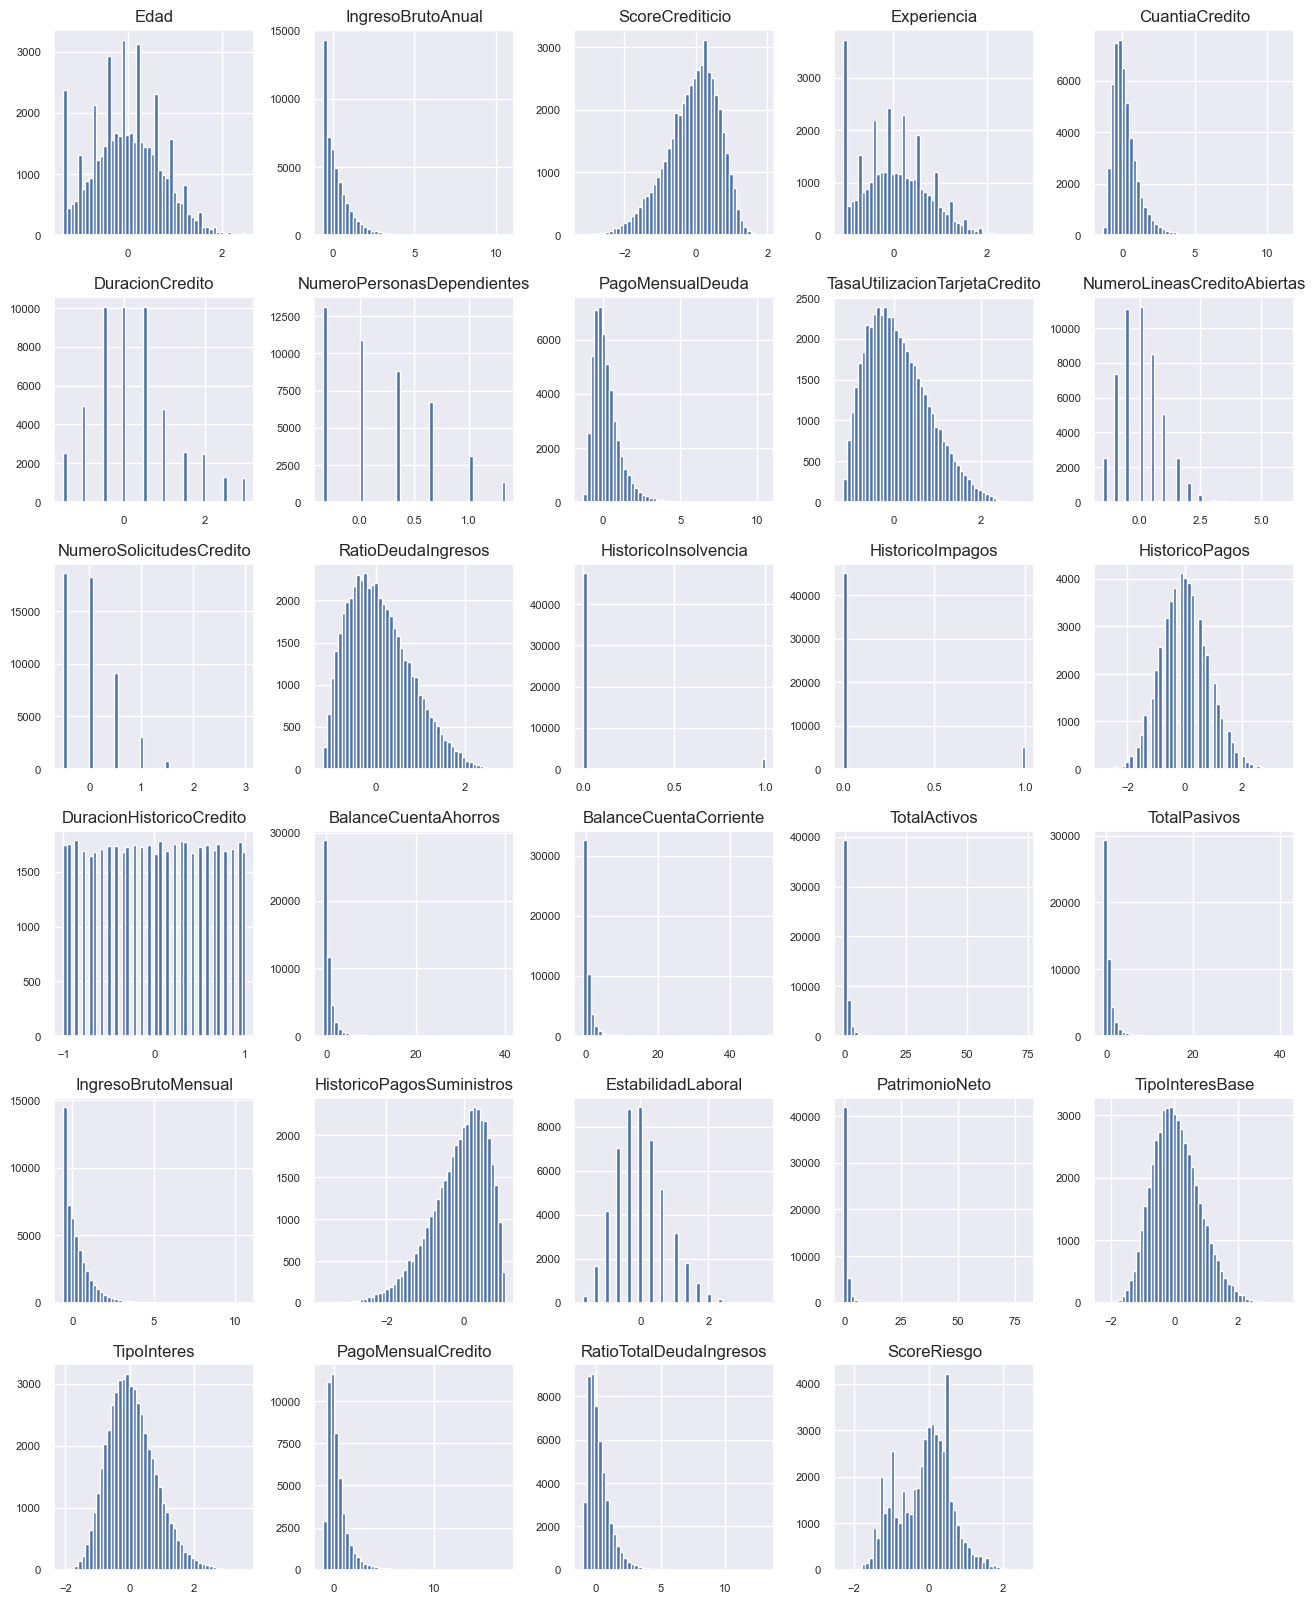

In [40]:
df_num_scaled.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

Aunque visualmente observamos que los outliers siguen estando ahí, su influencia en el modelo se reduce en comparación con un escalado basado en la media, lo que suele mejorar el rendimiento en algoritmos que son sensibles a los valores extremos.

OTRA COSA DE OUTLIERS DISTINTA:

Ahora buscaremos detectar los outliers. En nuestro caso los eliminaremos. Falta un estudio más en profundidad. De momento he encontrado algo llamado IQR, pero también he visto que skrlearn tiene algo para detectar outliers.

In [21]:
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcular los cuantiles para las columnas numéricas
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir las condiciones para eliminar los outliers en las columnas numéricas
condicion_sin_outliers = ~((df_numerico < (Q1 - 10 * IQR)) | (df_numerico > (Q3 + 10 * IQR))).any(axis=1)

# Aplicar la condición para filtrar el DataFrame original
df_filtrado = df[condicion_sin_outliers]

# Mostrar las dimensiones del nuevo DataFrame
print(df_filtrado.shape)

(42247, 34)


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape